In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
ba_house_listings = pd.read_csv('BAN_612_Group5_House_Market_Cleaned_Data.csv')

In [3]:
ba_house_listings

,AddressLine,StateCode,City,Zipcode,PropertyPrice,BedRooms,BathRooms,Property_Sqft,School_rating,Garage,YearBuilt,TimeOnRedfin,PropertyType,PropertyStyle,PropertyCommunity,TimeOnRedfin_Days
0,3950 Vineyard Ave,CA,Pleasanton,94566,1725000.0,3.0,2.0,1700.0,8,Yes,1921,31 days,Single Family Residential,Craftsman,DOWN TOWN,31.0
1,673 Palomino Dr Unit C,CA,Pleasanton,94566,774000.0,2.0,2.0,1198.0,7,Yes,1985,32 days,Townhouse,Contemporary,OAK TREE VILLAS,32.0
2,219 Rachael Pl,CA,Pleasanton,94566,990000.0,3.0,2.5,1446.0,7,Yes,1989,34 days,Condo,Contemporary,COUNTRY ROADS,34.0
3,843 Division St Unit B,CA,Pleasanton,94566,530000.0,2.0,1.5,948.0,8,No,1959,24 days,Condo,Contemporary,DOWNTOWN AREA,24.0
4,7835 Canyon Meadow Cir Unit B,CA,Pleasanton,94588,715000.0,3.0,2.0,1257.0,7,Yes,1991,53 days,Condo,Contemporary,CANYON MEADOWS,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,700 Ardleigh Ct,CA,San-Ramon,94583,3195000.0,5.0,5.5,5035.0,9,Yes,2002,3 days,Single Family Residential,Traditional,NORRIS CYN ESTAT,3.0
815,45 Longwood Ct,CA,San-Ramon,94582,1999000.0,4.0,2.5,2602.0,9,Yes,1983,46 days,Single Family Residential,Custom,VISTA SAN RAMON,46.0
816,3130 Sweetviolet Dr,CA,San-Ramon,94582,2225000.0,5.0,4.5,3207.0,7,Yes,2013,5 days,Single Family Residential,Contemporary,GALE RANCH,5.0
817,3855 Crow Canyon Rd,CA,San-Ramon,94582,745000.0,2.0,2.0,1107.0,9,Yes,1988,6 days,Condo,Contemporary,COBBLESTONE,6.0


In [4]:
ba_house_listings.columns

Index(['AddressLine', 'StateCode', 'City', 'Zipcode', 'PropertyPrice',
       'BedRooms', 'BathRooms', 'Property_Sqft', 'School_rating', 'Garage',
       'YearBuilt', 'TimeOnRedfin', 'PropertyType', 'PropertyStyle',
       'PropertyCommunity', 'TimeOnRedfin_Days'],
      dtype='object')

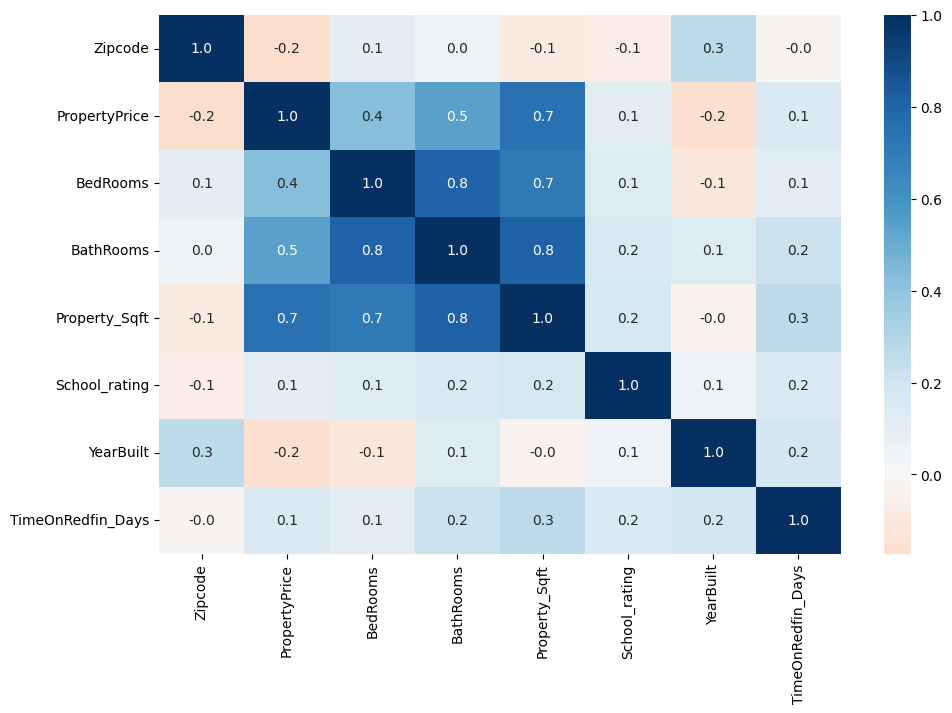

In [5]:
# Displaying Heatmap to demonstrate correlation
ba_house_listings_Corr = ba_house_listings.select_dtypes(include='number')
corr = ba_house_listings_Corr.corr()
fig, cx = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot = True, fmt = ".1f", cmap = "RdBu", center = 0, ax = cx)
plt.show()

In [25]:
def dollar_axis():
    fmt = '${x:,.0f}'
    tick = mtick.StrMethodFormatter(fmt)
    return tick

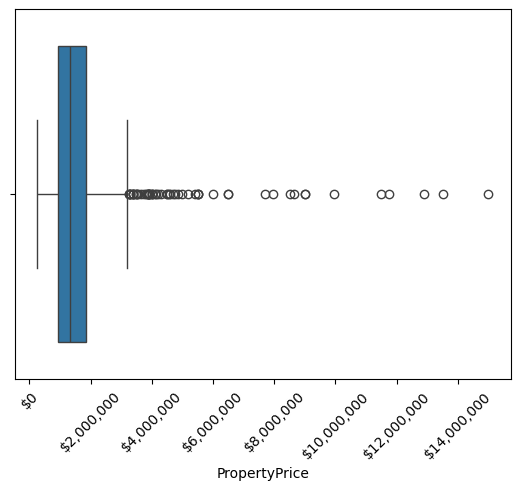

In [13]:
# Property distribution box plot
bx = sns.boxplot(x = ba_house_listings['PropertyPrice'], data = ba_house_listings)
#fmt = '${x:,.0f}'
#tick = mtick.StrMethodFormatter(fmt)
bx.xaxis.set_major_formatter(dollar_axis())
plt.xticks(rotation = 45)
plt.show()


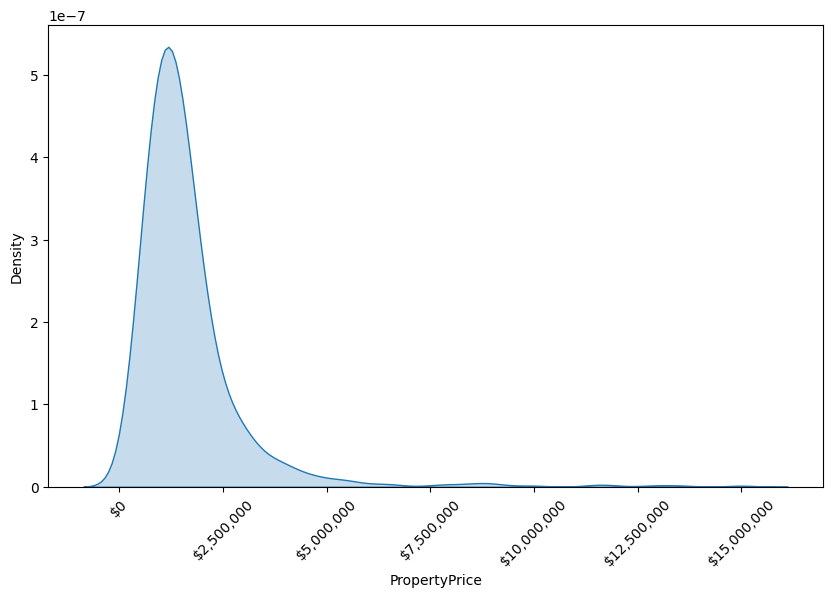

In [14]:
# KDE plot of Price Distibution
plt.figure(figsize = (10,6))
kd = sns.kdeplot(ba_house_listings['PropertyPrice'], fill = True)
kd.xaxis.set_major_formatter(dollar_axis())
#kd.yaxis.set_major_formatter(tick)
plt.xticks(rotation = 45)

plt.show()

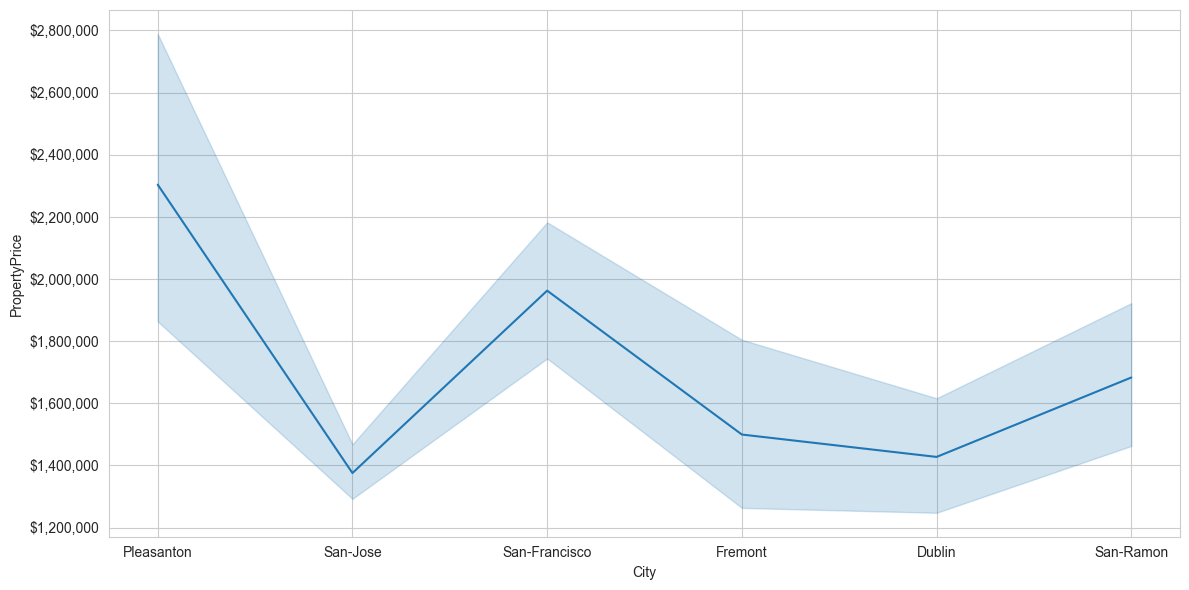

In [25]:
# Line plot to display rage of property prices across different cities
plt.figure(figsize = (12, 6))
ax = sns.lineplot(x = "City", y = "PropertyPrice", data = ba_house_listings)
ax.yaxis.set_major_formatter(dollar_axis())
plt.tight_layout()
plt.show()

/var/folders/2y/cp111lys6l115n9y8pt2t7y00000gn/T/ipykernel_915/821690641.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  px = sns.boxplot(x ='City', y = 'per_sqft_price', data = ba_house_listings,palette = 'Set1')


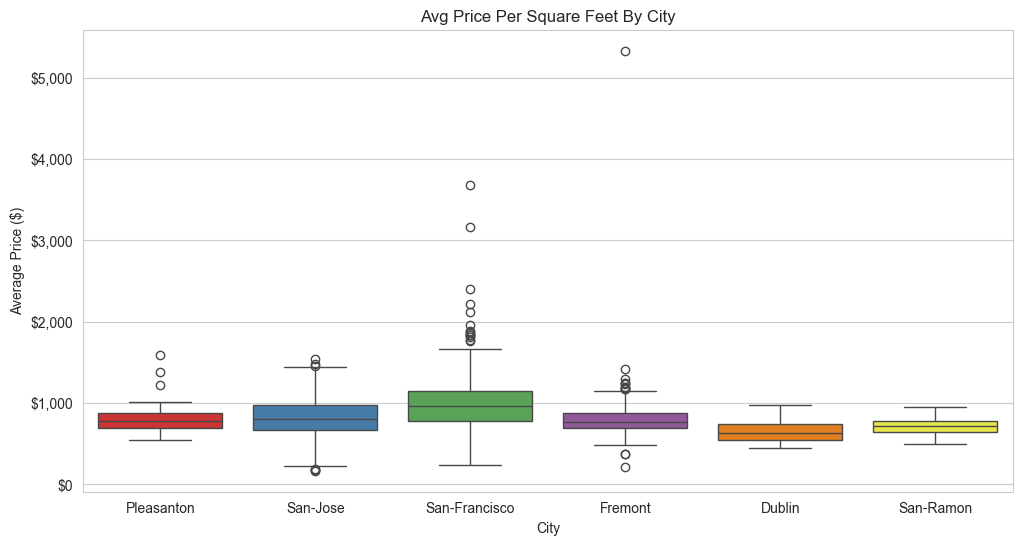

In [27]:
#Average Property price per sqft by city
ba_house_listings['per_sqft_price'] = (ba_house_listings['PropertyPrice']/ba_house_listings['Property_Sqft']).round(1)
sns.set_style("whitegrid")
plt.figure(figsize = (12, 6))
px = sns.boxplot(x ='City', y = 'per_sqft_price', data = ba_house_listings,palette = 'Set1')
plt.xlabel('City')
plt.ylabel('Average Price ($)')
px.yaxis.set_major_formatter(dollar_axis())
plt.title('Avg Price Per Square Feet By City')
plt.show()

/var/folders/2y/cp111lys6l115n9y8pt2t7y00000gn/T/ipykernel_838/3183500659.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  roi = sns.barplot(x = avg_price_by_city.index, y = avg_price_by_city.values, palette = 'viridis')


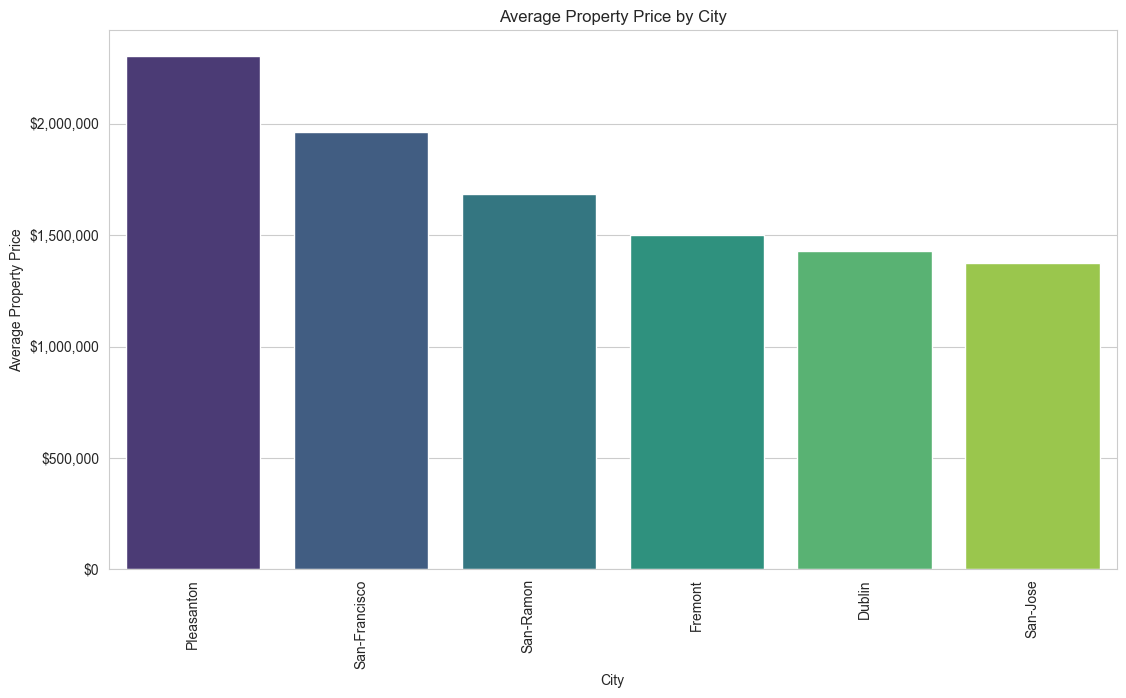

In [19]:
#Return on Investment (ROI) by Location:
avg_price_by_city = ba_house_listings.groupby('City')['PropertyPrice'].mean().sort_values(ascending = False)
plt.figure(figsize = (13, 7))
roi = sns.barplot(x = avg_price_by_city.index, y = avg_price_by_city.values, palette = 'viridis')
roi.yaxis.set_major_formatter(dollar_axis())
plt.xticks(rotation = 90)
plt.title('Average Property Price by City')
plt.xlabel('City')
plt.ylabel('Average Property Price')
plt.show()

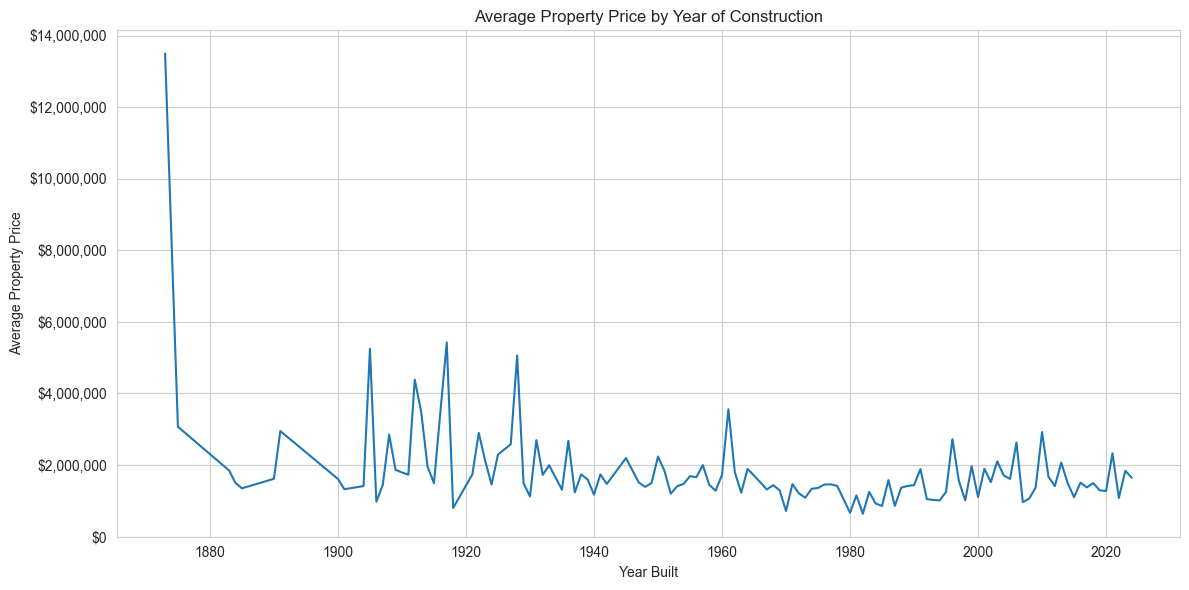

In [20]:
# Average property price by year of construction
avg_price_by_year = ba_house_listings.groupby('YearBuilt')['PropertyPrice'].mean()
plt.figure(figsize = (12, 6))
yx = sns.lineplot(x = avg_price_by_year.index, y = avg_price_by_year.values)
yx.yaxis.set_major_formatter(dollar_axis())
plt.title('Average Property Price by Year of Construction')
plt.xlabel('Year Built')
plt.ylabel('Average Property Price')
plt.tight_layout()
plt.show()

/var/folders/2y/cp111lys6l115n9y8pt2t7y00000gn/T/ipykernel_838/4036766033.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  roi = sns.barplot(x=avg_year_built_by_city.index, y=avg_year_built_by_city.values, palette='viridis')


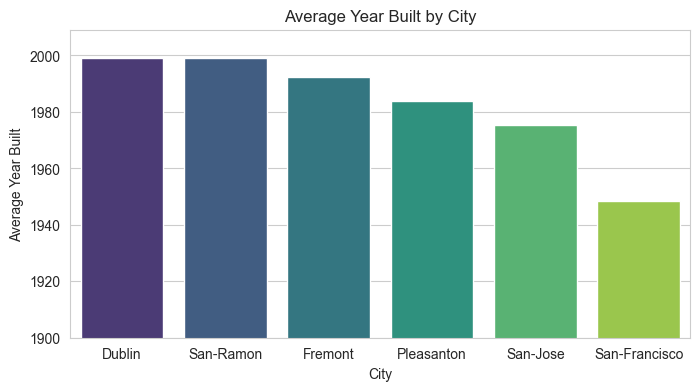

In [21]:
# Average year by city
avg_year_built_by_city = ba_house_listings.groupby('City')['YearBuilt'].mean().sort_values(ascending = False)
plt.figure(figsize = (8, 4))
roi = sns.barplot(x = avg_year_built_by_city.index, y = avg_year_built_by_city.values, palette = 'viridis')
plt.title('Average Year Built by City')
plt.xlabel('City')
plt.ylabel('Average Year Built')
plt.ylim(1900, avg_year_built_by_city.max() + 10)
plt.show()

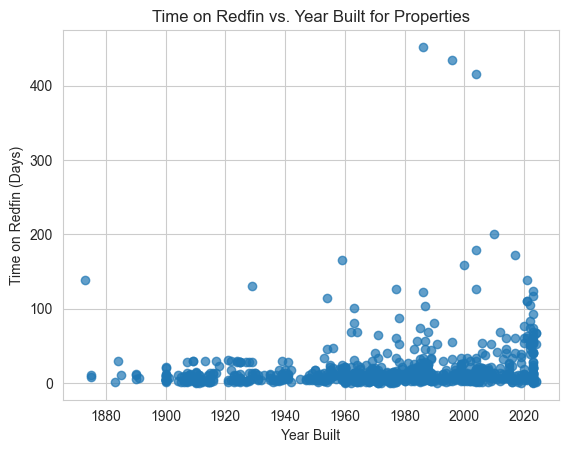

In [22]:
# No.of Days listed on REDFIN vs Year Built

plt.scatter(ba_house_listings['YearBuilt'], ba_house_listings['TimeOnRedfin_Days'], alpha = 0.7)
plt.xlabel('Year Built')
plt.ylabel('Time on Redfin (Days)')
plt.title('Time on Redfin vs. Year Built for Properties')
plt.grid(True)
plt.show()

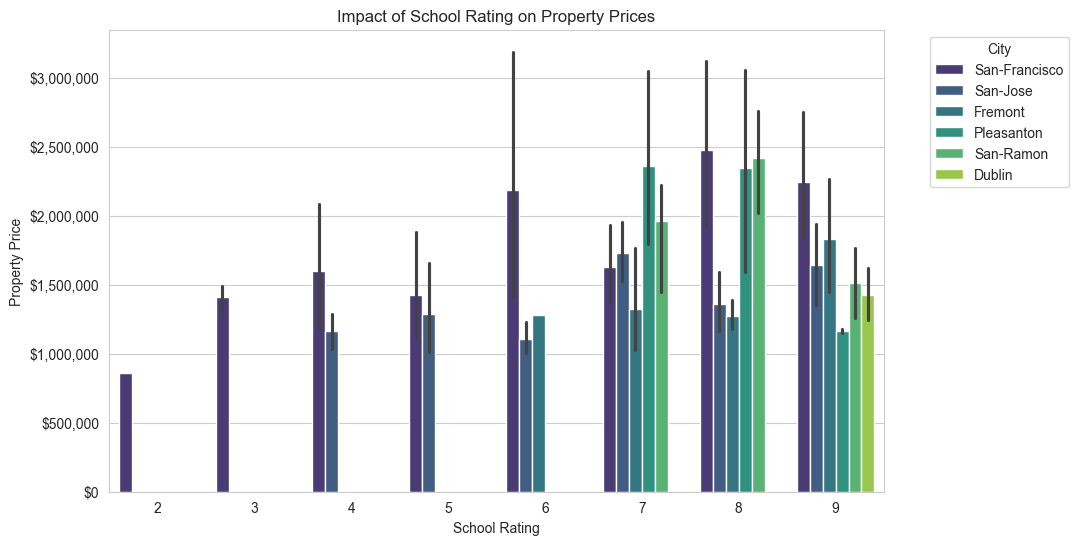

In [24]:
# Amenities - School Rating vs Property Prices
plt.figure(figsize = (10, 6))
ax = sns.barplot(data = ba_house_listings, x = 'School_rating', y = 'PropertyPrice', hue = 'City', palette = 'viridis')
ax.yaxis.set_major_formatter(dollar_axis())
plt.title('Impact of School Rating on Property Prices')
plt.xlabel('School Rating')
plt.ylabel('Property Price')
plt.legend(title = 'City', bbox_to_anchor = (1.05, 1), loc ='upper left')
plt.show()

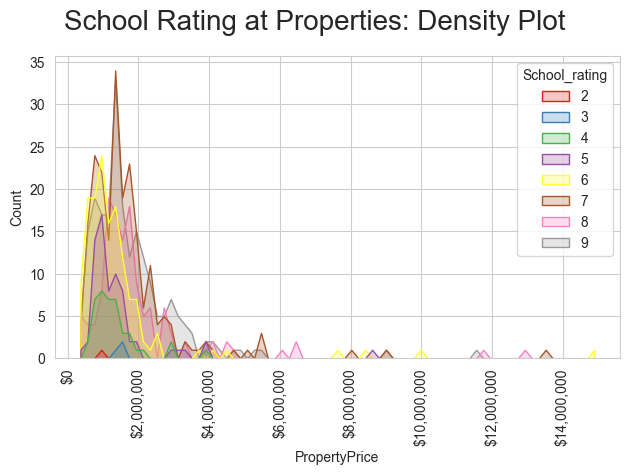

In [27]:
# Amenities - School Rating vs Property Prices - DENSITY PLOT
fig, ax = plt.subplots()
fig.suptitle("School Rating at Properties: Density Plot", fontsize = 20)
custom_palette = sns.color_palette("Set1",as_cmap = True)
k = sns.histplot(data = ba_house_listings, x = "PropertyPrice", hue = "School_rating", element="poly", color = None, palette = custom_palette)
k.xaxis.set_major_formatter(dollar_axis())
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

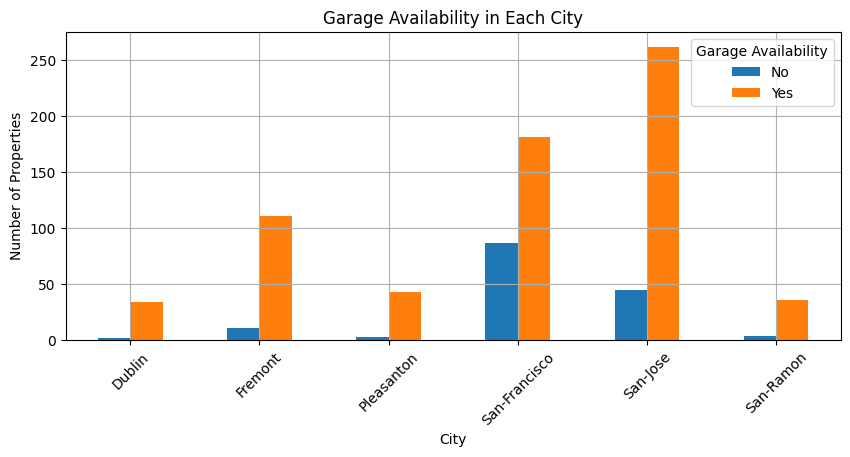

In [21]:
# Plot of garage availability per each city

garage_avl = ba_house_listings[ba_house_listings['Garage'].isin(['Yes', 'No'])]
grg_city = pd.crosstab(index = garage_avl['City'], columns = garage_avl['Garage'])
grc = grg_city.plot(kind = 'bar', stacked = False, figsize = (10, 4))
grc.set_xlabel('City')
grc.set_ylabel('Number of Properties')
grc.set_title('Garage Availability in Each City')
plt.legend(title = 'Garage Availability', loc = 'upper right')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

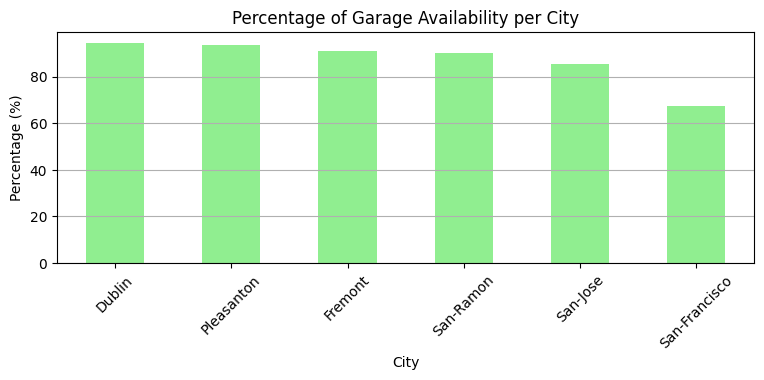

In [23]:
# Percentage of garage availability per city
garage_ct = pd.crosstab(index = ba_house_listings['City'], columns = ba_house_listings['Garage'], normalize = 'index')
grg_aval_yes = garage_ct['Yes'] * 100
grg_aval_yes = grg_aval_yes.sort_values(ascending = False)
grg_aval_yes.plot(kind = 'bar', figsize = (9, 3), color = 'lightgreen')
plt.title('Percentage of Garage Availability per City')
plt.xlabel('City')
plt.ylabel('Percentage (%)')
plt.xticks(rotation = 45)
plt.grid(axis='y')
plt.show()

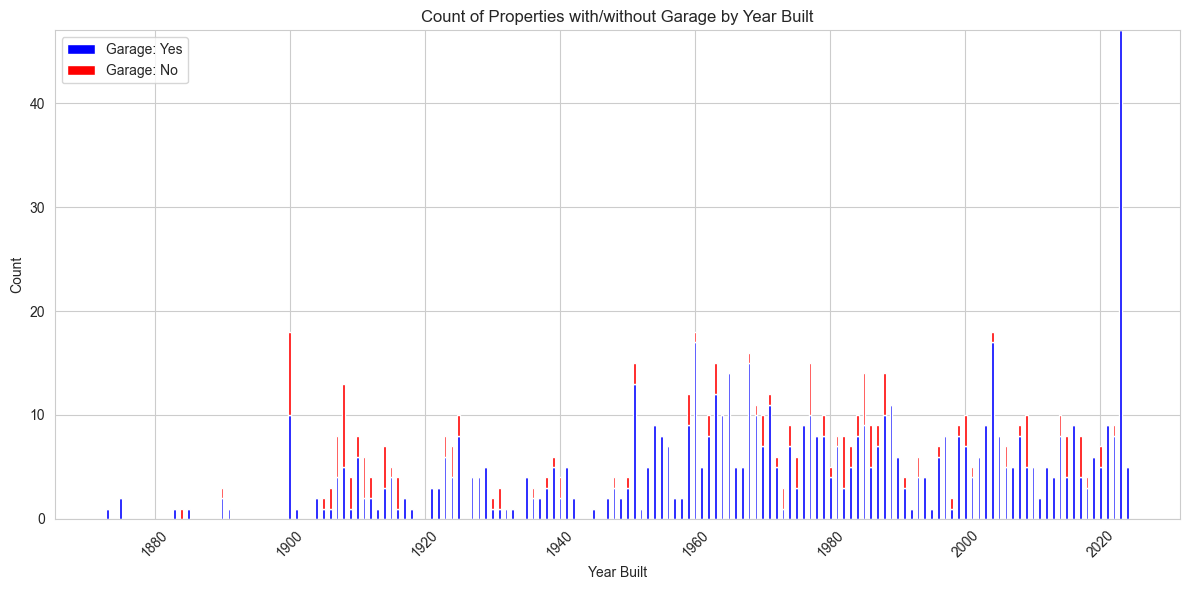

In [32]:
# Garage Availability based on year built
#counts = pd.crosstab(index = ba_house_listings['YearBuilt'], columns = ba_house_listings['Garage'], normalize = 'index')
counts = ba_house_listings.groupby(['YearBuilt', 'Garage']).size().unstack().fillna(0)
years = sorted(ba_house_listings['YearBuilt'].unique())
width = 0.4
plt.figure(figsize=(12, 6))
p1 = plt.bar(years, counts['Yes'], width, label='Garage: Yes', color='blue')
p2 = plt.bar(years, counts['No'], width, bottom=counts['Yes'], label='Garage: No', color='red')
plt.xlabel('Year Built')
plt.ylabel('Count')
plt.title('Count of Properties with/without Garage by Year Built')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

/var/folders/2y/cp111lys6l115n9y8pt2t7y00000gn/T/ipykernel_915/1835123706.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pt = sns.boxplot(data = ba_house_listings, x = 'PropertyType', y = 'PropertyPrice', palette = 'Set3')


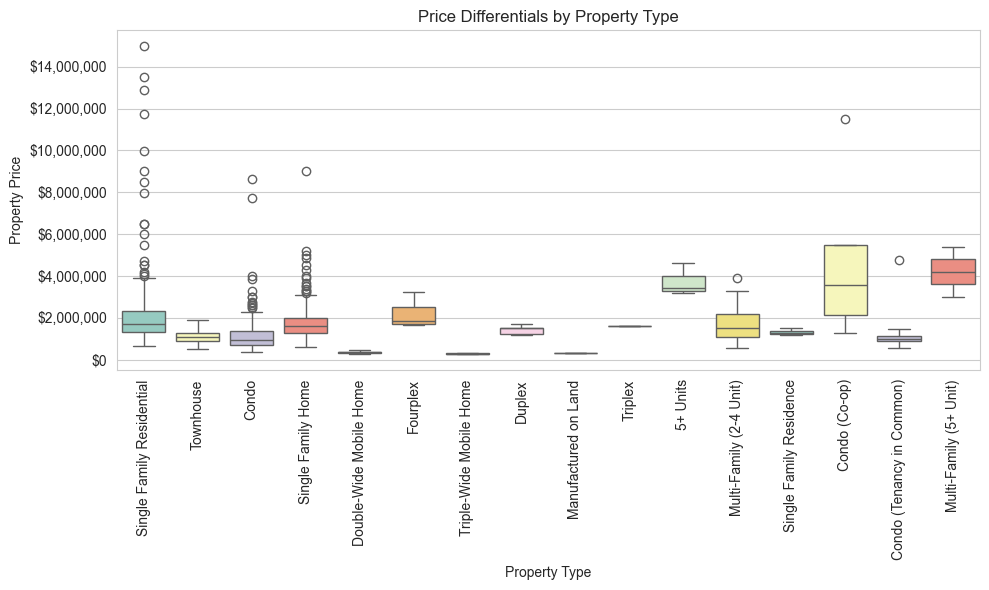

In [54]:
#Property price vs property type
plt.figure(figsize = (10, 6))
pt = sns.boxplot(data = ba_house_listings, x = 'PropertyType', y = 'PropertyPrice', palette = 'Set3')
pt.yaxis.set_major_formatter(dollar_axis())
plt.xticks(rotation = 90)
plt.title('Price Differentials by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Property Price')
plt.tight_layout()
plt.show()

In [55]:
# Plot for Property Type vs Garage Availability

pt_ga = pd.crosstab(ba_house_listings.PropertyType,ba_house_listings.Garage)
pt_ga

Garage,No,Yes
PropertyType,,
5+ Units,1,2
Condo,70,186
Condo (Co-op),1,7
Condo (Tenancy in Common),11,7
Double-Wide Mobile Home,16,0
Duplex,1,4
Fourplex,4,3
Manufactured on Land,1,0
Multi-Family (2-4 Unit),5,27


<Axes: xlabel='PropertyType'>

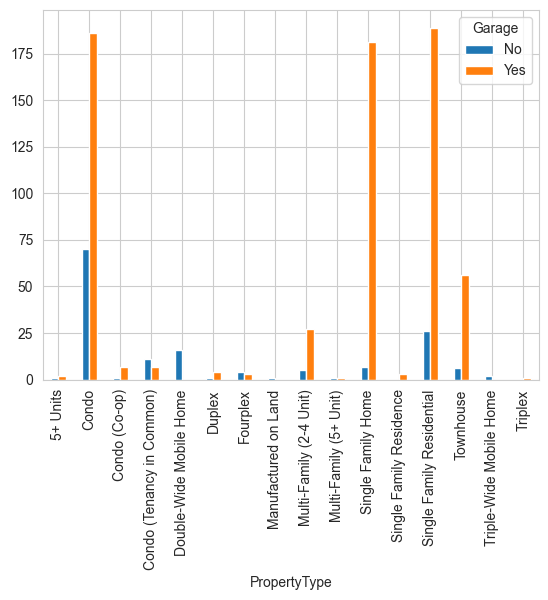

In [56]:
pt_ga.plot.bar()

/var/folders/2y/cp111lys6l115n9y8pt2t7y00000gn/T/ipykernel_915/4118012496.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=avg_price_by_city.index, y=avg_price_by_city.values, palette='viridis')


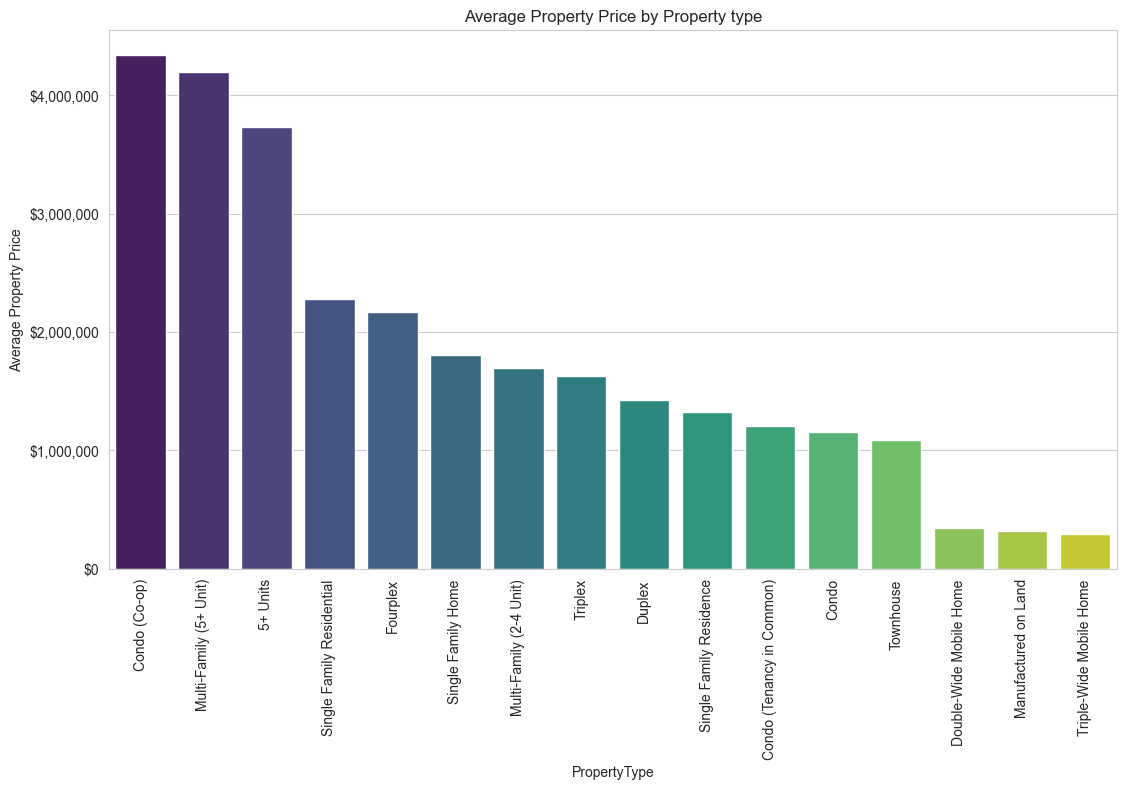

In [57]:
# Avg property price vs Property type

avg_price_by_city = ba_house_listings.groupby('PropertyType')['PropertyPrice'].mean().sort_values(ascending=False)
plt.figure(figsize = (13, 7))
ax = sns.barplot(x = avg_price_by_city.index, y = avg_price_by_city.values, palette='viridis')
ax.yaxis.set_major_formatter(dollar_axis())
plt.xticks(rotation = 90)
plt.title('Average Property Price by Property type')
plt.xlabel('PropertyType')
plt.ylabel('Average Property Price')
#plt.tight_layout()
plt.show()

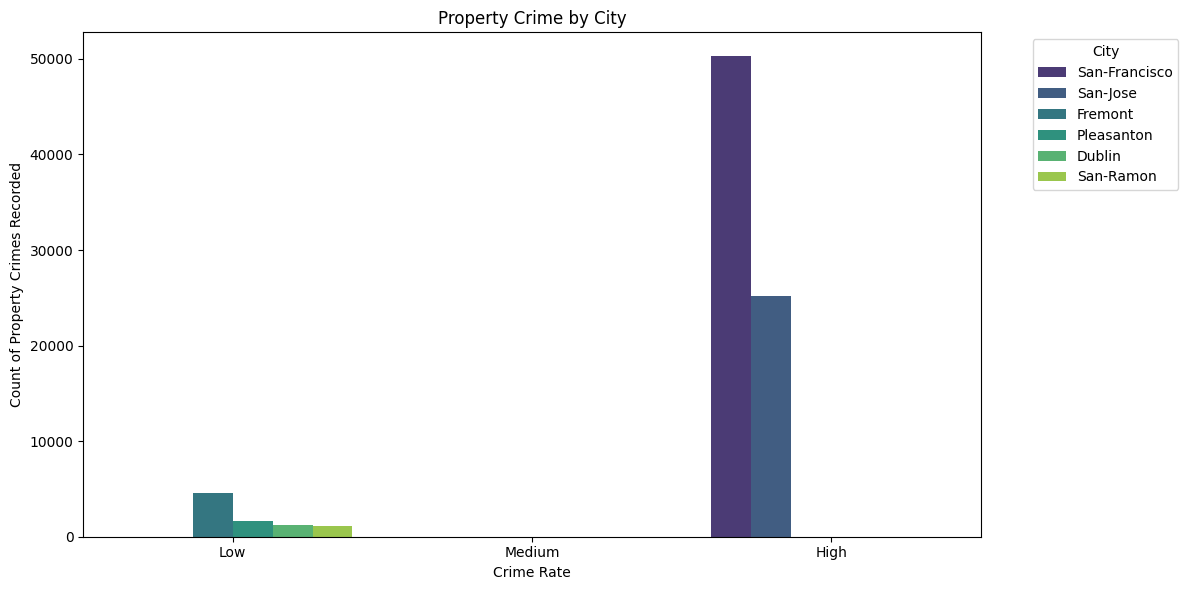

In [20]:
# Crime Rate
# Downloaded this data from gov website

crime_df = pd.read_csv('BayAreaCrimeRate.csv')

merged_df = pd.merge(ba_house_listings, crime_df, on='City', how='inner')
merged_df = merged_df.sort_values(by = 'PropertyCrime', ascending=False)

merged_df['CrimeRateCategory'] = pd.cut(merged_df['PropertyCrime'], bins=[1000, 5000, 25000, float('inf')], labels=['Low', 'Medium', 'High'])
plt.figure(figsize = (12, 6))
sns.barplot(data=merged_df, x='CrimeRateCategory', y='PropertyCrime', hue='City', palette='viridis')
plt.title('Property Crime by City')
plt.xlabel('Crime Rate')
plt.ylabel('Count of Property Crimes Recorded')
#plt.xticks(rotation=45)
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [81]:
import dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm

no display found. Using non-interactive Agg backend


In [82]:
ba_house_listings.head()

,AddressLine,StateCode,City,Zipcode,PropertyPrice,BedRooms,BathRooms,Property_Sqft,School_rating,Garage,YearBuilt,TimeOnRedfin,PropertyType,PropertyStyle,PropertyCommunity,TimeOnRedfin_Days
0,3950 Vineyard Ave,CA,Pleasanton,94566,1725000.0,3.0,2.0,1700.0,8,Yes,1921,31 days,Single Family Residential,Craftsman,DOWN TOWN,31.0
1,673 Palomino Dr Unit C,CA,Pleasanton,94566,774000.0,2.0,2.0,1198.0,7,Yes,1985,32 days,Townhouse,Contemporary,OAK TREE VILLAS,32.0
2,219 Rachael Pl,CA,Pleasanton,94566,990000.0,3.0,2.5,1446.0,7,Yes,1989,34 days,Condo,Contemporary,COUNTRY ROADS,34.0
3,843 Division St Unit B,CA,Pleasanton,94566,530000.0,2.0,1.5,948.0,8,No,1959,24 days,Condo,Contemporary,DOWNTOWN AREA,24.0
4,7835 Canyon Meadow Cir Unit B,CA,Pleasanton,94588,715000.0,3.0,2.0,1257.0,7,Yes,1991,53 days,Condo,Contemporary,CANYON MEADOWS,53.0


In [83]:
ba_house_listings['City'] = ba_house_listings['City'].str.replace('-','_')
ba_house_listings.head()

,AddressLine,StateCode,City,Zipcode,PropertyPrice,BedRooms,BathRooms,Property_Sqft,School_rating,Garage,YearBuilt,TimeOnRedfin,PropertyType,PropertyStyle,PropertyCommunity,TimeOnRedfin_Days
0,3950 Vineyard Ave,CA,Pleasanton,94566,1725000.0,3.0,2.0,1700.0,8,Yes,1921,31 days,Single Family Residential,Craftsman,DOWN TOWN,31.0
1,673 Palomino Dr Unit C,CA,Pleasanton,94566,774000.0,2.0,2.0,1198.0,7,Yes,1985,32 days,Townhouse,Contemporary,OAK TREE VILLAS,32.0
2,219 Rachael Pl,CA,Pleasanton,94566,990000.0,3.0,2.5,1446.0,7,Yes,1989,34 days,Condo,Contemporary,COUNTRY ROADS,34.0
3,843 Division St Unit B,CA,Pleasanton,94566,530000.0,2.0,1.5,948.0,8,No,1959,24 days,Condo,Contemporary,DOWNTOWN AREA,24.0
4,7835 Canyon Meadow Cir Unit B,CA,Pleasanton,94588,715000.0,3.0,2.0,1257.0,7,Yes,1991,53 days,Condo,Contemporary,CANYON MEADOWS,53.0


In [84]:
housing_df = ba_house_listings

In [85]:
housing_df['Per_Sq_feet_price'] = (housing_df['PropertyPrice']/(housing_df['Property_Sqft'])).round(1)
housing_df['BedRooms'] = housing_df['BedRooms'].astype('int')
housing_df['BathRooms'] = housing_df['BathRooms'].astype('int')
housing_df.head()

,AddressLine,StateCode,City,Zipcode,PropertyPrice,BedRooms,BathRooms,Property_Sqft,School_rating,Garage,YearBuilt,TimeOnRedfin,PropertyType,PropertyStyle,PropertyCommunity,TimeOnRedfin_Days,Per_Sq_feet_price
0,3950 Vineyard Ave,CA,Pleasanton,94566,1725000.0,3,2,1700.0,8,Yes,1921,31 days,Single Family Residential,Craftsman,DOWN TOWN,31.0,1014.7
1,673 Palomino Dr Unit C,CA,Pleasanton,94566,774000.0,2,2,1198.0,7,Yes,1985,32 days,Townhouse,Contemporary,OAK TREE VILLAS,32.0,646.1
2,219 Rachael Pl,CA,Pleasanton,94566,990000.0,3,2,1446.0,7,Yes,1989,34 days,Condo,Contemporary,COUNTRY ROADS,34.0,684.6
3,843 Division St Unit B,CA,Pleasanton,94566,530000.0,2,1,948.0,8,No,1959,24 days,Condo,Contemporary,DOWNTOWN AREA,24.0,559.1
4,7835 Canyon Meadow Cir Unit B,CA,Pleasanton,94588,715000.0,3,2,1257.0,7,Yes,1991,53 days,Condo,Contemporary,CANYON MEADOWS,53.0,568.8


In [86]:
housing_df.columns

Index(['AddressLine', 'StateCode', 'City', 'Zipcode', 'PropertyPrice',
       'BedRooms', 'BathRooms', 'Property_Sqft', 'School_rating', 'Garage',
       'YearBuilt', 'TimeOnRedfin', 'PropertyType', 'PropertyStyle',
       'PropertyCommunity', 'TimeOnRedfin_Days', 'Per_Sq_feet_price'],
      dtype='object')

In [87]:
# Partition the data
trainData, validData = train_test_split(housing_df, test_size=0.40, random_state=1)


In [88]:
predictors = ['City','BedRooms', 'BathRooms', 'Property_Sqft', 
              'School_rating', 'Garage','Per_Sq_feet_price','YearBuilt',
              'TimeOnRedfin_Days'
             ]
outcome = 'PropertyPrice'

# partition data
X = pd.get_dummies(housing_df[predictors], drop_first=True)
y = housing_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

housing_lm = LinearRegression()
housing_lm.fit(train_X, train_y)

# print coefficients
print('intercept ', housing_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': housing_lm.coef_}))

# print performance measures
regressionSummary(train_y, housing_lm.predict(train_X))

intercept  -1630913.7767708695
             Predictor    coefficient
0             BedRooms  -96296.979488
1            BathRooms  -20659.874251
2        Property_Sqft     902.814739
3        School_rating   14681.220892
4    Per_Sq_feet_price    2440.569675
5            YearBuilt    -123.879628
6    TimeOnRedfin_Days    -705.748443
7         City_Fremont  -40847.558018
8      City_Pleasanton   40466.816529
9   City_San_Francisco -136048.865060
10       City_San_Jose   -8960.524303
11      City_San_Ramon   -5347.818967
12          Garage_Yes    -935.479552

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 398646.5793
            Mean Absolute Error (MAE) : 217912.7895
          Mean Percentage Error (MPE) : 2.8817
Mean Absolute Percentage Error (MAPE) : 18.5888


In [89]:
pred_y = housing_lm.predict(train_X)

print('adjusted r2 : ', adjusted_r2_score(train_y, pred_y, housing_lm))
print('AIC : ', AIC_score(train_y, pred_y, housing_lm))
print('BIC : ', BIC_score(train_y, pred_y, housing_lm))

adjusted r2 :  0.9153742687481548
AIC :  14087.10322709481
BIC :  14150.049889011729


In [90]:
# Use predict() to make predictions on a new set
housing_lm_pred = housing_lm.predict(valid_X)

# Compute common accuracy measures
regressionSummary(valid_y, housing_lm_pred)


Regression statistics

                      Mean Error (ME) : 45454.5970
       Root Mean Squared Error (RMSE) : 555174.0373
            Mean Absolute Error (MAE) : 260655.7788
          Mean Percentage Error (MPE) : 4.9337
Mean Absolute Percentage Error (MAPE) : 21.4274


In [91]:
# run a linear regression of Price on the remaining predictors in the training set
train_df = train_X.join(train_y)

predictors = train_X.columns
formula = 'PropertyPrice ~ ' + ' + '.join(predictors)

housing_lm = sm.ols(formula=formula, data=train_df).fit()
print(housing_lm.summary())

                            OLS Regression Results                            
Dep. Variable:          PropertyPrice   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     408.7
Date:                Fri, 13 Oct 2023   Prob (F-statistic):          7.40e-249
Time:                        14:39:41   Log-Likelihood:                -7028.6
No. Observations:                 491   AIC:                         1.409e+04
Df Residuals:                     477   BIC:                         1.414e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [92]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

bestBE_model, best_variables = backward_elimination(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: BedRooms, BathRooms, Property_Sqft, School_rating, Per_Sq_feet_price, YearBuilt, TimeOnRedfin_Days, City_Fremont, City_Pleasanton, City_San_Francisco, City_San_Jose, City_San_Ramon, Garage_Yes
Start: score=14087.10
Step: score=14085.10, remove Garage_Yes
Step: score=14083.11, remove City_San_Ramon
Step: score=14081.11, remove City_San_Jose
Step: score=14079.14, remove YearBuilt
Step: score=14077.47, remove City_Pleasanton
Step: score=14075.98, remove City_Fremont
Step: score=14074.57, remove BathRooms
Step: score=14073.98, remove School_rating
Step: score=14073.85, remove TimeOnRedfin_Days
Step: score=14073.85, remove None
['BedRooms', 'Property_Sqft', 'Per_Sq_feet_price', 'City_San_Francisco']


In [93]:
regressionSummary(valid_y, bestBE_model.predict(valid_X[best_variables]))


Regression statistics

                      Mean Error (ME) : 45752.5701
       Root Mean Squared Error (RMSE) : 556400.1158
            Mean Absolute Error (MAE) : 258850.3378
          Mean Percentage Error (MPE) : 4.7314
Mean Absolute Percentage Error (MAPE) : 21.1195
